### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
data = pd.read_csv("vehicle.csv", )
data.shape

(846, 19)

In [3]:
data = data.dropna()
data.shape

(813, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [5]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [7]:
data['class'].value_counts(normalize=True)

car    0.507995
bus    0.252153
van    0.239852
Name: class, dtype: float64

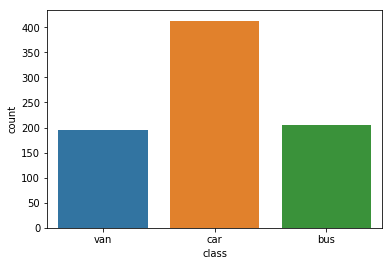

In [8]:
sns.countplot(x='class', data=data)

###### Cars ~= 51%
###### bus ~= 25%
###### van ~= 23%


### Check for any missing values in the data 

In [9]:
#since we have already dropped na, this is not required

### 3. Standardize the data 

In [10]:
data = data.drop(['class'], axis=1)
# since 'class' is the dependant variable, we are removing it from the list of independant variables used for clustering

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [11]:
X = data.apply(st.zscore)
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [12]:
model_kmean = KMeans(n_clusters=4, random_state=44).fit(X)
sum(np.min(cdist(X, model_kmean.cluster_centers_, metric='euclidean'), axis=1)**2/X.shape[0])


7.061774962529409

### 5. Calculating distortion - C distance

In [13]:
distortions = []
C = range(1, 11)
for c in C:
    model_kmean = KMeans(n_clusters=c, random_state=44).fit(X)
    distortion = sum(np.min(cdist(X, model_kmean.cluster_centers_, metric='euclidean'), axis=1)**2/X.shape[0])
    distortions.append(distortion)


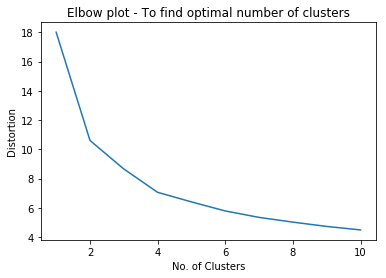

In [14]:
plt.title("Elbow plot - To find optimal number of clusters")
plt.xlabel("No. of Clusters")
plt.ylabel("Distortion")
plt.plot(C, distortions)

### Find out the optimal value of K

In [15]:
#### optimal number of clusters = 4, as beyond 4 the drop in distortion is not very sharp. 
optimal_clusters = 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [16]:
model_kmean = KMeans(n_clusters=optimal_clusters, random_state=44).fit(X)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [17]:
model_kmean.cluster_centers_

array([[-1.77926274e-01, -6.12019616e-01, -2.97587802e-01,
         2.04512354e-02,  2.01668080e-01, -1.80273603e-01,
        -4.31799185e-01,  2.86319889e-01, -4.63195107e-01,
        -5.74020947e-01, -3.97747522e-01, -4.35651397e-01,
        -6.41055881e-01, -7.09095913e-01, -2.86420482e-02,
         5.37687678e-02,  9.63652967e-01,  8.14107010e-01],
       [ 1.15736176e+00,  1.18688991e+00,  1.21376707e+00,
         9.73764988e-01,  9.46906393e-02,  2.19180218e-01,
         1.30158336e+00, -1.21649970e+00,  1.30627647e+00,
         1.10069002e+00,  1.20916828e+00,  1.31287479e+00,
         1.09370231e+00, -1.03892856e-01,  1.58104393e-01,
         2.69747448e-01, -1.70122247e-03,  1.87217384e-01],
       [-8.73939377e-01, -4.90666958e-01, -8.19987596e-01,
        -1.00914774e+00, -4.88356546e-01, -2.75961304e-01,
        -7.59559699e-01,  8.28143534e-01, -7.31863992e-01,
        -4.54863559e-01, -7.72863866e-01, -7.64634145e-01,
        -3.79292105e-01,  6.60977993e-01, -1.09968514e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [18]:
pd.DataFrame(columns=X.columns, data=model_kmean.cluster_centers_)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.177926,-0.612020,-0.297588,0.020451,0.201668,-0.180274,-0.431799,0.286320,-0.463195,-0.574021,-0.397748,-0.435651,-0.641056,-0.709096,-0.028642,0.053769,0.963653,0.814107
1,1.157362,1.186890,1.213767,0.973765,0.094691,0.219180,1.301583,-1.216500,1.306276,1.100690,1.209168,1.312875,1.093702,-0.103893,0.158104,0.269747,-0.001701,0.187217
2,-0.873939,-0.490667,-0.819988,-1.009148,-0.488357,-0.275961,-0.759560,0.828144,-0.731864,-0.454864,-0.772864,-0.764634,-0.379292,0.660978,-0.109969,-0.297173,-0.941479,-0.974511
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### Use kmeans.labels_ function to print out the labels of the classes

In [19]:
labels = model_kmean.labels_
len(labels[labels==0])

275

In [20]:
len(labels[labels==1])

255

In [21]:
len(labels[labels==2]) 
##these 8 samples of this cluster seem to have more distance between groups and quite less within the group. 

275

In [22]:
len(labels[labels==3])

8

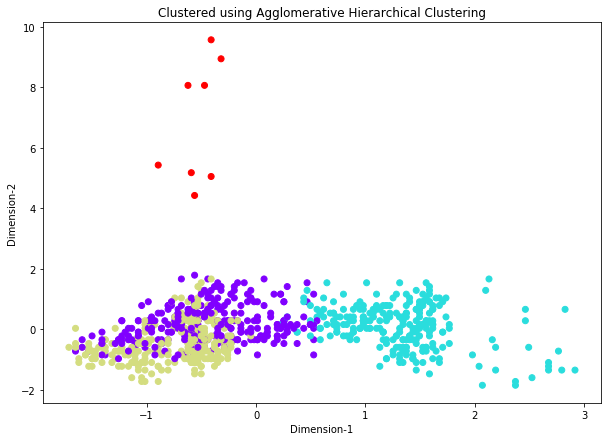

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Clustered using Agglomerative Hierarchical Clustering")
plt.xlabel("Dimension-1")
plt.ylabel("Dimension-2")
plt.scatter(X.iloc[:,6], X.iloc[:,4], c=labels, cmap='rainbow')  # plot points with cluster dependent colors
plt.show()

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [25]:
np.random.seed(44)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [26]:
X = np.concatenate((a, b, c))
print(X.shape)
X[0:5]

(250, 2)


array([[10.8801693 , -2.44021898],
       [ 9.30082577,  3.58018133],
       [ 6.08967596, -1.29219264],
       [12.21499964,  3.32681716],
       [10.67014529, -0.5463518 ]])

### 10. Use scatter matrix to print all the 3 distributions

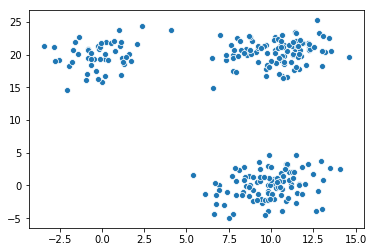

In [27]:
sns.scatterplot(x=X[:,0], y=X[:,1],  cmap='rainbow')

### 11. Find out the linkage matrix

In [28]:
Z = linkage(X, 'ward', metric='euclidean')

Z.shape

# It holds the n-1 = 250-1 = 249 iterations statistics
# column1 - Index of First cluster, 
# column2 - Index of Second Cluster, 
# column3 - Distance between these two clusters, 
# column4 - No of elements after merge of these two clusters


(249, 4)

Use ward as linkage metric and distance as Eucledian

In [29]:
Z

# Observation:
# First few iterations merged 1+1=2 elements to form new cluster
# last iteration has all elements=250 to form new and final cluster

array([[2.31000000e+02, 2.48000000e+02, 4.65263205e-02, 2.00000000e+00],
       [1.72000000e+02, 1.98000000e+02, 8.06159775e-02, 2.00000000e+00],
       [4.70000000e+01, 5.50000000e+01, 9.10660828e-02, 2.00000000e+00],
       [2.11000000e+02, 2.38000000e+02, 1.02543701e-01, 2.00000000e+00],
       [2.05000000e+02, 2.10000000e+02, 1.07826323e-01, 2.00000000e+00],
       [1.53000000e+02, 1.66000000e+02, 1.15886343e-01, 2.00000000e+00],
       [1.74000000e+02, 2.18000000e+02, 1.17197659e-01, 2.00000000e+00],
       [2.80000000e+01, 4.10000000e+01, 1.24251708e-01, 2.00000000e+00],
       [1.03000000e+02, 1.32000000e+02, 1.24787887e-01, 2.00000000e+00],
       [7.00000000e+01, 7.20000000e+01, 1.27464280e-01, 2.00000000e+00],
       [1.57000000e+02, 1.68000000e+02, 1.27489780e-01, 2.00000000e+00],
       [1.67000000e+02, 2.17000000e+02, 1.29706298e-01, 2.00000000e+00],
       [1.20000000e+02, 1.26000000e+02, 1.30468671e-01, 2.00000000e+00],
       [1.83000000e+02, 2.02000000e+02, 1.32934797e

### 12. Plot the dendrogram for the consolidated dataframe

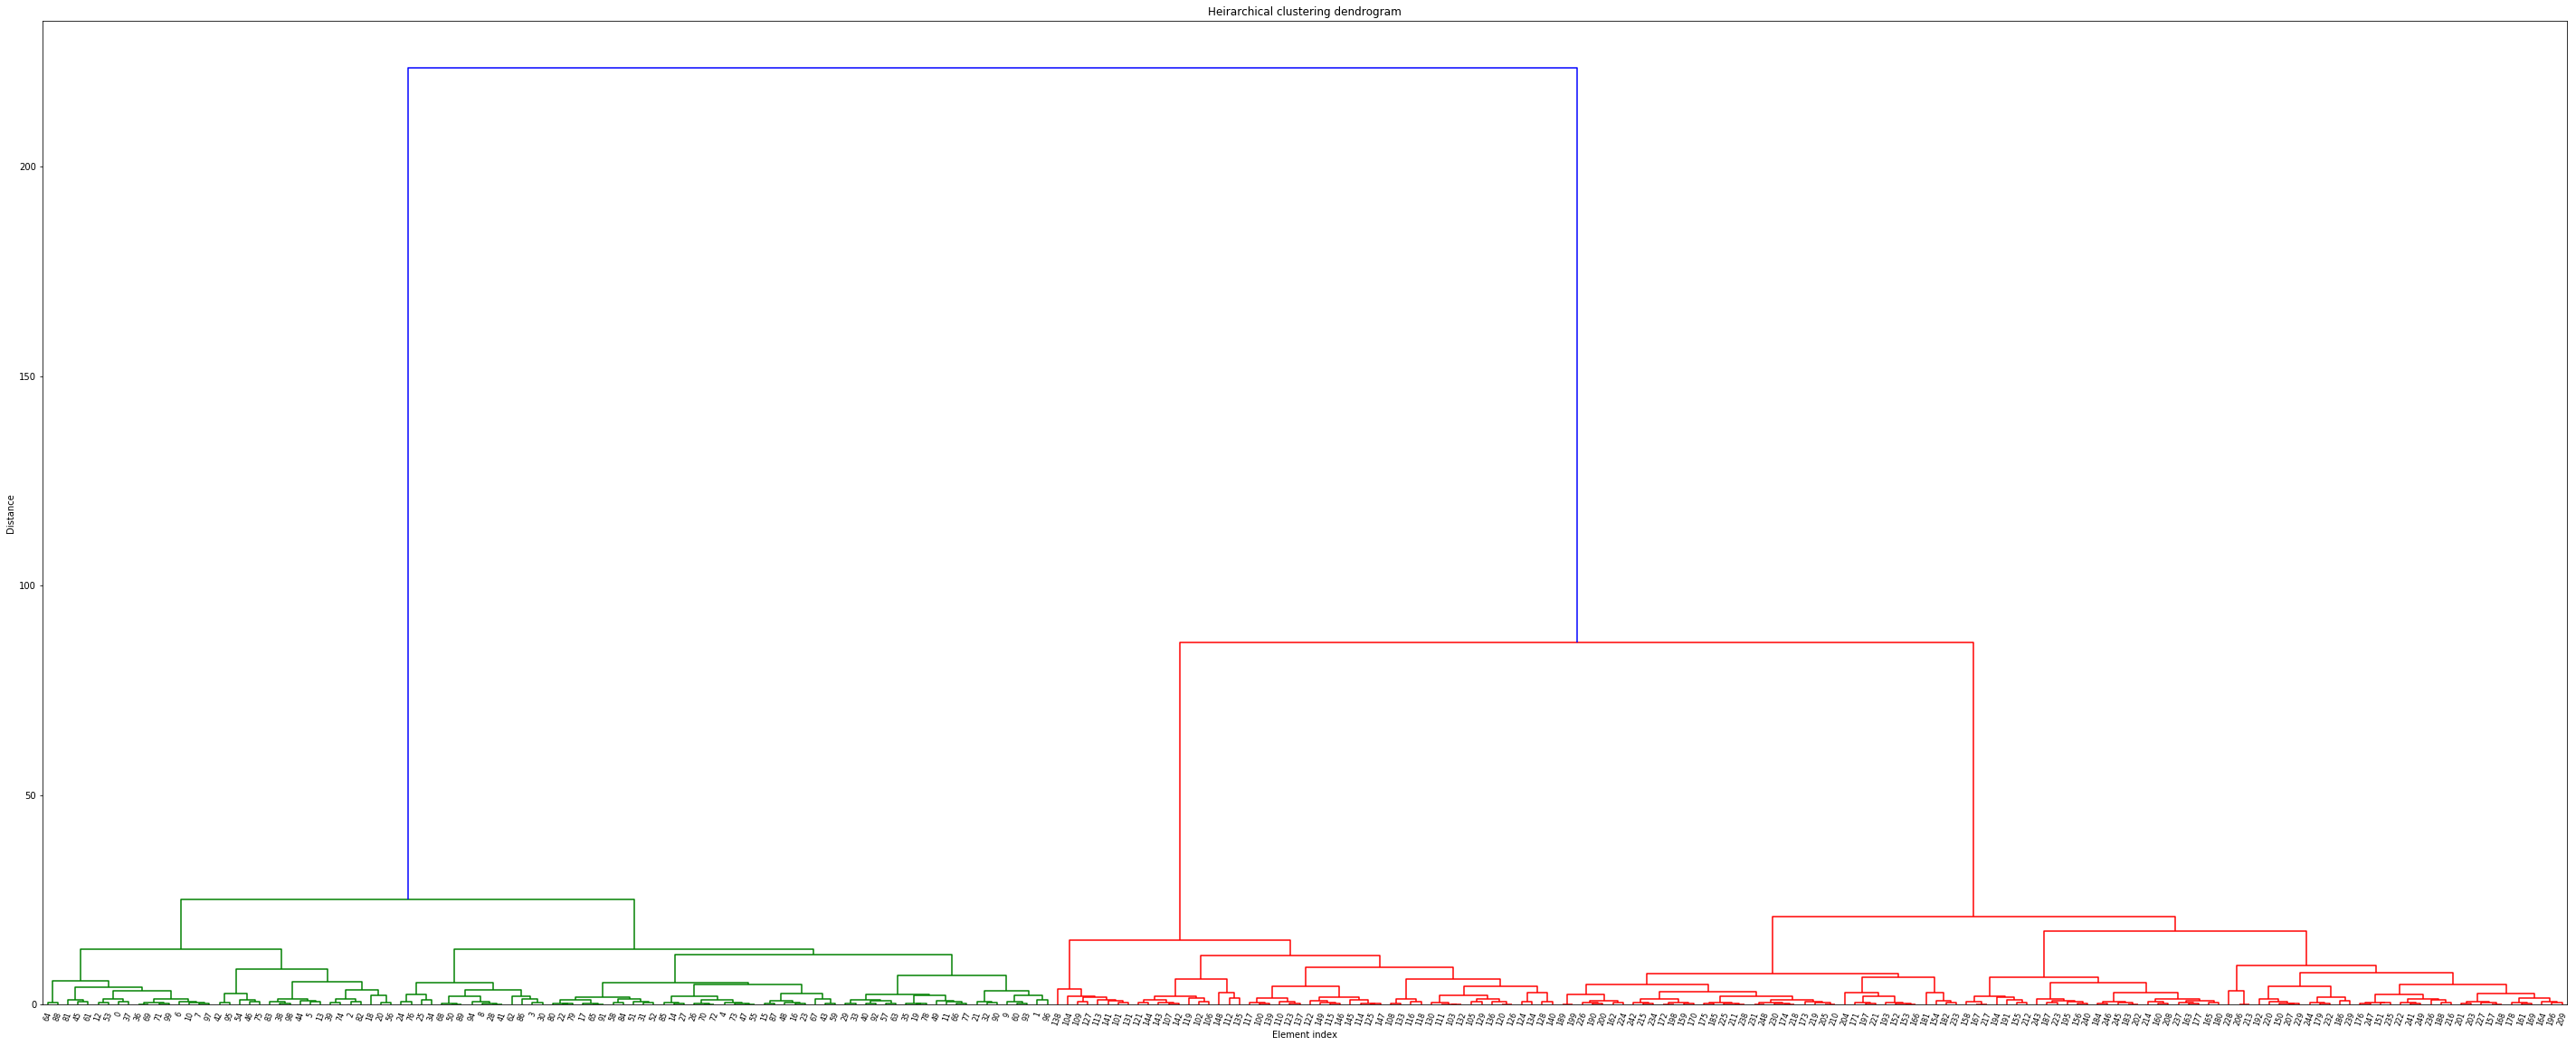

In [30]:
plt.figure(figsize=(50,20))
plt.title('Heirarchical clustering dendrogram')
plt.xlabel("Element index")
plt.ylabel("Distance")
dendrogram(Z, 
           distance_sort=False,    
           leaf_rotation=70.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
        )
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

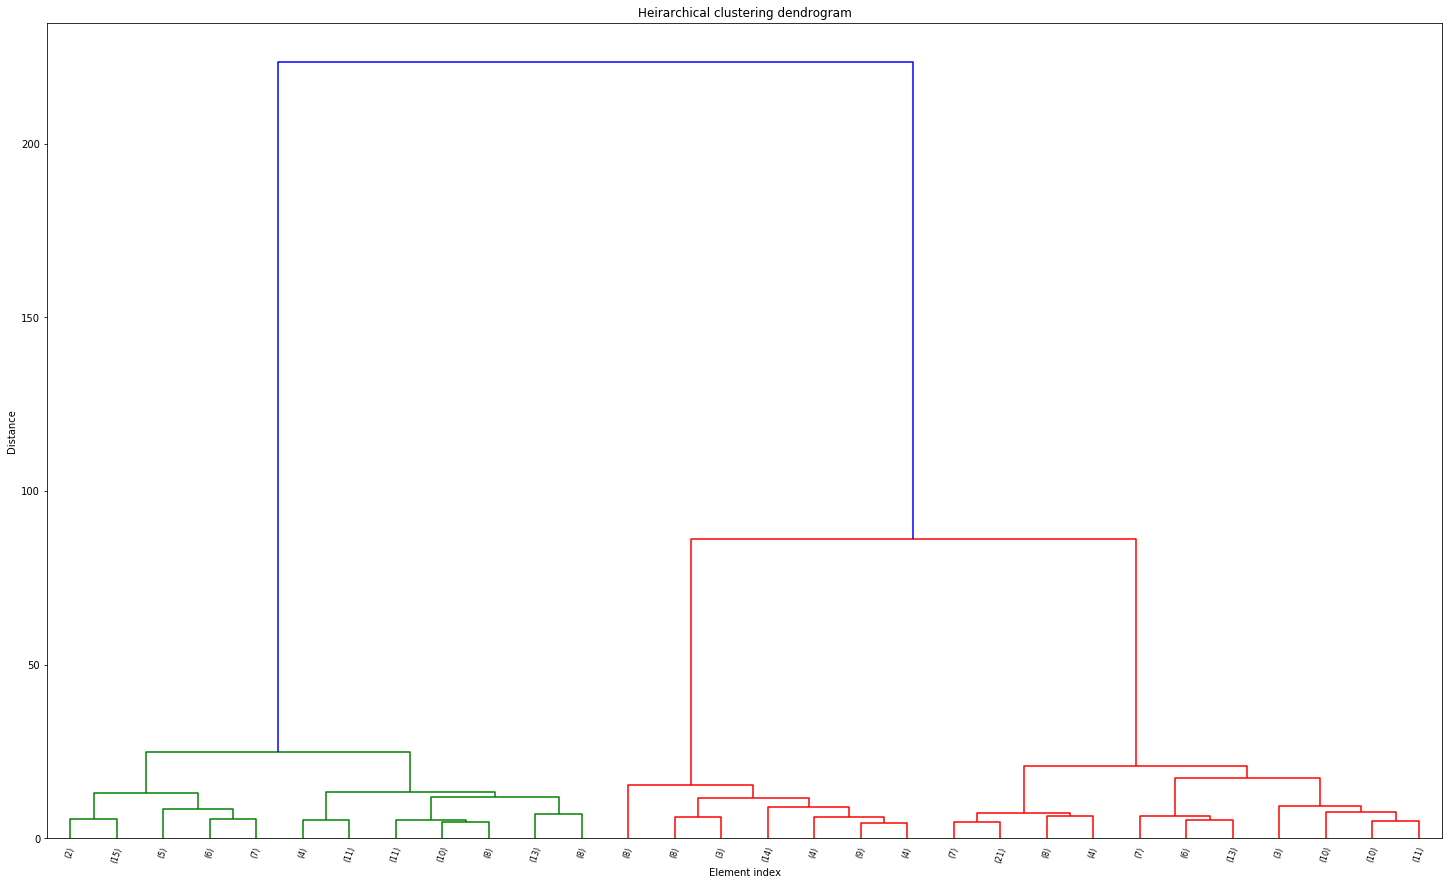

In [31]:
plt.figure(figsize=(25,15))
plt.title('Heirarchical clustering dendrogram')
plt.xlabel("Element index")
plt.ylabel("Distance")
dendrogram(Z, 
           distance_sort=False,    
           leaf_rotation=70.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
           truncate_mode='lastp'
        )
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [32]:
# If we use optimal distance as 50, we should get 3 clean clusters.
optimal_distance = 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [33]:
clusters = fcluster(Z, optimal_distance, criterion='distance')
clusters # cluster-id for each element index for all 250 elements in Z. eg. it has assinged cluster=1 for element=0 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [34]:
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts)) ## shows cluster -1 has 100, cluster-2 has 50 and cluster -3 has 100 elements

{1: 100, 2: 50, 3: 100}

### Use matplotlib to visually observe the clusters in 2D space 

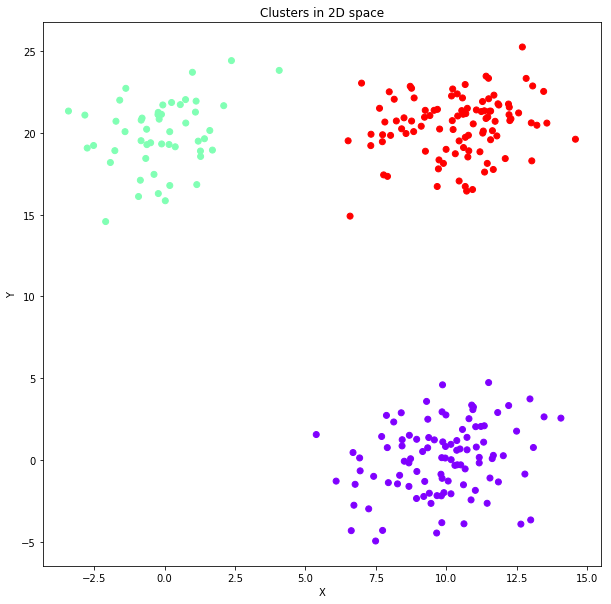

In [35]:
plt.figure(figsize=(10,10))
plt.title("Clusters in 2D space")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X[:,0], X[:,1], c=clusters,  cmap='rainbow')